In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#import os
#os.getcwd()
#os.listdir(os.getcwd())

#os.chdir("")
df = pd.read_csv('C:/Users/andyw/Documents/Python Scripts/Withings_Sleep_Data/sleep.csv')
next_week = date.today() + timedelta(days=7)
sns.set(style="whitegrid")

In [3]:
#print(df.head())

In [4]:
df['from'] = pd.to_datetime(df['from'], utc=True)
df['to'] = pd.to_datetime(df['to'], utc=True)
#df['Date'] = pd.to_datetime(df['Date'])
df.index = pd.to_datetime(df['from'],format='%y/%m/%d %I:%M%p')
df.groupby(by=[df.index.month, df.index.year])

# Creates a month column by striping just the month out of the date.
df['month'] = df['to'].dt.strftime('%b')

df.rename(columns={"from": "day_start_sleeping", "to": "Day_of_wake_up"})
df['Total_Sleep'] = (df['light (s)'] + df['deep (s)'] + df['rem (s)'])/3600
round(df['Total_Sleep'], 2)

from
2020-02-03 02:50:00+00:00    7.67
2020-02-04 03:31:00+00:00    6.47
2020-02-05 03:40:00+00:00    6.73
2020-02-06 03:38:00+00:00    6.13
2020-02-07 03:36:00+00:00    6.38
                             ... 
2020-12-01 03:58:00+00:00    7.60
2020-12-02 04:20:00+00:00    6.72
2020-12-03 03:47:00+00:00    6.17
2020-12-04 04:09:00+00:00    6.92
2020-12-05 03:53:00+00:00    7.85
Name: Total_Sleep, Length: 287, dtype: float64

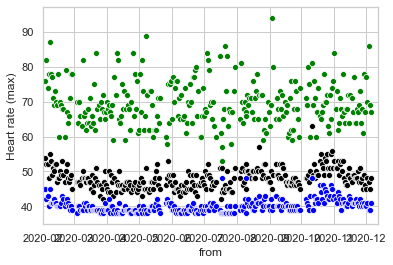

In [5]:
ax = sns.scatterplot(x='from', y='Average heart rate', data=df, color='black')
ax = sns.scatterplot(x='from', y='Heart rate (min)', data=df, color='blue')
ax = sns.scatterplot(x='from', y='Heart rate (max)', data=df, color='green')
ax = plt.xlim(pd.to_datetime('2020-02-01'), next_week)

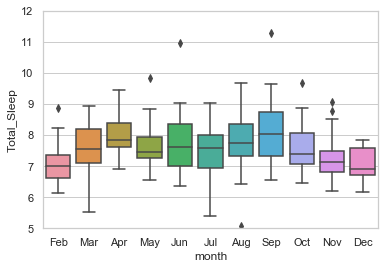

In [11]:
ax = sns.boxplot(x='month', y='Total_Sleep', data=df)
ax = plt.ylim(5, 12)

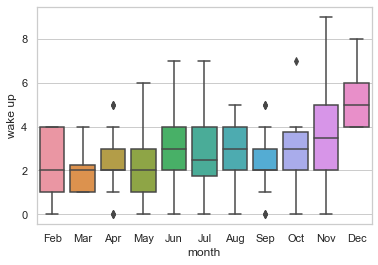

In [8]:
ax = sns.boxplot(x='month', y='wake up', data=df)

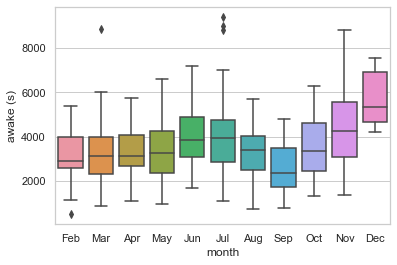

In [9]:
ax = sns.boxplot(x='month', y='awake (s)', data=df)

In [7]:
ax =sns.boxplot(x='month', y='Sleep Score', data=df)

ValueError: Could not interpret input 'Sleep Score'